# Model Training

### 1.1 Import Data and Required Packages

##### Importing Pandas, Numpy , Matplotlib, Seaborn and Warnings Library.

In [24]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings

### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and y Variables

In [7]:
X = df.drop('math_score',axis=1)

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y = df['math_score']

In [10]:
# Create Column Transfoemer with 3 types of transformers
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),

    ]
)


C:\Users\vikra\AppData\Local\Temp\ipykernel_1416\2750806509.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_features = X.select_dtypes(include=['object']).columns


In [11]:
X = preprocessor.fit_transform(X)

In [15]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [14]:
# separate dataset into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 19), (200, 19), (800,), (200,))

### Create an Evaluate Function to give all metrics after model training

In [16]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2 = r2_score(true,predicted)
    return mae,mse,rmse,r2


In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGB Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False)
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test) 

    #Evaluate Train and Test dataset
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance on Train set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean absolute error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('-------------------------------------')

    print('Model performance on Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean absolute error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

Linear Regression
Model performance on Train set
- Root Mean Squared Error: 5.3231
- Mean absolute error: 4.2667
- R2 Score: 0.8743
-------------------------------------
Model performance on Test set
- Root Mean Squared Error: 5.3940
- Mean absolute error: 4.2148
- R2 Score: 0.8804
Ridge Regression
Model performance on Train set
- Root Mean Squared Error: 5.3233
- Mean absolute error: 4.2650
- R2 Score: 0.8743
-------------------------------------
Model performance on Test set
- Root Mean Squared Error: 5.3904
- Mean absolute error: 4.2111
- R2 Score: 0.8806
Lasso Regression
Model performance on Train set
- Root Mean Squared Error: 6.5938
- Mean absolute error: 5.2063
- R2 Score: 0.8071
-------------------------------------
Model performance on Test set
- Root Mean Squared Error: 6.5197
- Mean absolute error: 5.1579
- R2 Score: 0.8253
KNN Regressor
Model performance on Train set
- Root Mean Squared Error: 5.7091
- Mean absolute error: 4.5175
- R2 Score: 0.8554
-------------------------

### Results

In [18]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','R2 Score']).sort_values(by='R2 Score',ascending=False)

,Model,R2 Score
1,Ridge Regression,0.880593
0,Linear Regression,0.880433
8,CatBoost Regressor,0.851632
5,Random Forest Regressor,0.850115
6,AdaBoost Regressor,0.844912
7,XGB Regressor,0.827797
2,Lasso Regression,0.825320
3,KNN Regressor,0.783497
4,Decision Tree Regressor,0.759553


### Linear Regression

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


### Plot y_pred and y_test

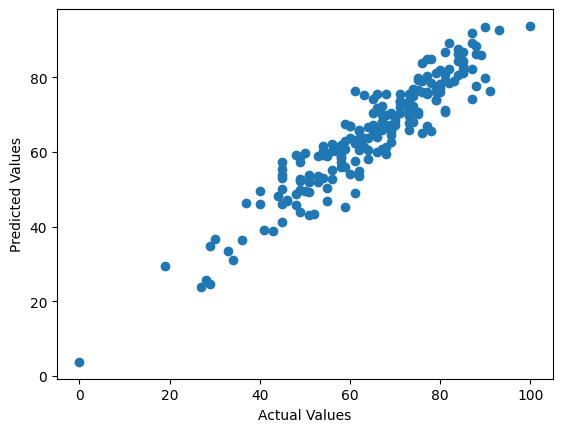

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel("Actual Values");
plt.ylabel("Predicted Values");

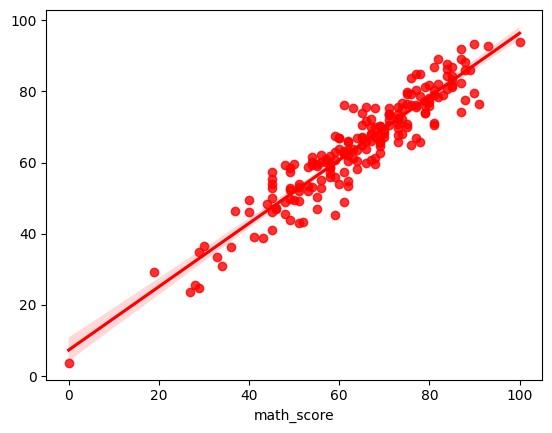

In [25]:
sns.regplot(x=y_test, y=y_pred, color="red");

### Difference between Actual and Predicted Values

In [26]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred,'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
